In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

In [3]:
#한글 깨짐 방지
from matplotlib import rc, font_manager
font_path='../data/fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
#마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus']=False

# 가격 상관분석

가격&생산량 데이터 불러오기

In [4]:
# 데이터 불러오기
mackerel_price=pd.read_csv('../data/mackerel/mackerel_price_interpolate.csv')
mackerel_output=pd.read_csv('../data/mackerel/부산_고등어_생산량(선어).csv',encoding='cp949')
mackerel_trade=pd.read_csv('../data/mackerel/고등어_수입_수출량_(년월).csv',encoding='cp949')
# merge
mackerel=pd.merge(mackerel_price,mackerel_output,on=['년도','월'])
mackerel=pd.merge(mackerel,mackerel_trade,on=['년도','월'])
mackerel
# mackerel=pd.merge(temperature,mackerel,on=['년도','월'])
# mackerel.to_csv('./data/merge/mackerel_total.csv',index=False)

,년도,월,가격 (원),생산량,수입,수출
0,2013,12,3225.0,21006,5386,NaN
1,2014,1,3422.0,5663,3476,4840.0
2,2014,2,4073.0,3565,1101,3402.0
3,2014,3,3891.0,2620,2011,2033.0
4,2014,4,4259.0,1525,2454,2122.0
...,...,...,...,...,...,...
116,2023,8,2932.0,5698,2876,12583.0
117,2023,9,2875.0,9903,349,10471.0
118,2023,10,2489.0,9163,193,13637.0
119,2023,11,2649.0,11462,2127,15640.0


In [5]:
df=mackerel[mackerel['년도']==2015]
corr=df.iloc[:,2:].corr()

<Axes: >

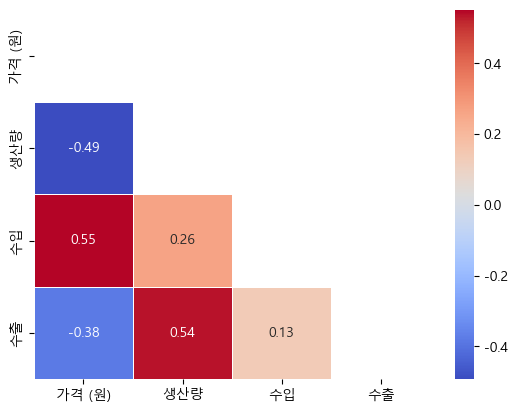

In [6]:
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,mask=mask, annot=True,cmap='coolwarm',linewidths=.5)

In [7]:
# 데이터 표준화
scaler_x=StandardScaler()
scaler_x.fit_transform(mackerel.iloc[:,2:])
test=scaler_x.transform(mackerel.iloc[:,2:])
mackerel_standard=pd.DataFrame(test)

### 생산량 및 가격 연평균 추이

In [8]:
mackerel_standard

,0,1,2,3
0,-0.029744,1.800210,0.531565,NaN
1,0.278188,-0.319968,-0.156177,0.255182
2,1.295771,-0.609880,-1.011353,-0.120424
3,1.011285,-0.740466,-0.683685,-0.478007
4,1.586509,-0.891779,-0.524173,-0.454760
...,...,...,...,...
116,-0.487735,-0.315131,-0.372221,2.277654
117,-0.576832,0.265938,-1.282129,1.726000
118,-1.180191,0.163681,-1.338300,2.552959
119,-0.930094,0.481369,-0.641917,3.076143


In [9]:
mackerel_standard.rename(columns={0:'가격 (원)',1:'생산량'}, inplace=True)
mackerel_standard

,가격 (원),생산량,2,3
0,-0.029744,1.800210,0.531565,NaN
1,0.278188,-0.319968,-0.156177,0.255182
2,1.295771,-0.609880,-1.011353,-0.120424
3,1.011285,-0.740466,-0.683685,-0.478007
4,1.586509,-0.891779,-0.524173,-0.454760
...,...,...,...,...
116,-0.487735,-0.315131,-0.372221,2.277654
117,-0.576832,0.265938,-1.282129,1.726000
118,-1.180191,0.163681,-1.338300,2.552959
119,-0.930094,0.481369,-0.641917,3.076143


In [10]:
mackerel_standard['년도']=mackerel['년도']
mackerel_standard['월']=mackerel['월']
mackerel_standard

,가격 (원),생산량,2,3,년도,월
0,-0.029744,1.800210,0.531565,NaN,2013,12
1,0.278188,-0.319968,-0.156177,0.255182,2014,1
2,1.295771,-0.609880,-1.011353,-0.120424,2014,2
3,1.011285,-0.740466,-0.683685,-0.478007,2014,3
4,1.586509,-0.891779,-0.524173,-0.454760,2014,4
...,...,...,...,...,...,...
116,-0.487735,-0.315131,-0.372221,2.277654,2023,8
117,-0.576832,0.265938,-1.282129,1.726000,2023,9
118,-1.180191,0.163681,-1.338300,2.552959,2023,10
119,-0.930094,0.481369,-0.641917,3.076143,2023,11


### 생산량 및 가격 월별 평균 추이

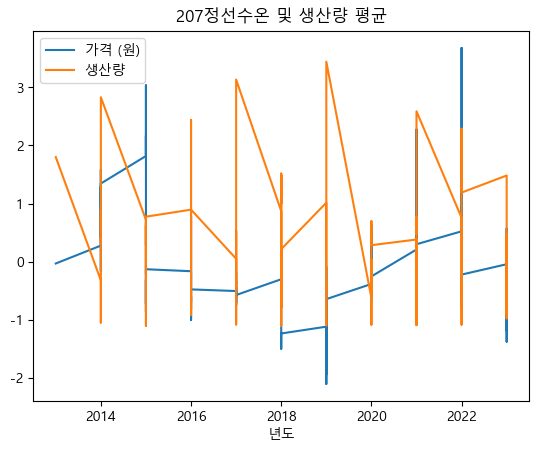

In [11]:
# 생산량 및 가격
plt.figure()


plt.title('207정선수온 및 생산량 평균')
plt.xlabel('년도')
plt.plot(mackerel_standard['년도'],mackerel_standard['가격 (원)'],label='가격 (원)')
plt.plot(mackerel_standard['년도'],mackerel_standard['생산량'],label='생산량')
plt.legend()
plt.show()

#### 수입량 데이터 불러오기

In [12]:
mackerel_import_quantity = pd.read_csv("../data/mackerel/국가별 고등어 수입 물량(kg).csv", encoding='cp949')
# '국가' 열을 기준으로 그룹화하여 각 국가별로 수출물량 합산
mackerel_import_quantity = mackerel_import_quantity.groupby('국가').sum()
# '구분' 열 삭제
mackerel_import_quantity = mackerel_import_quantity.drop(columns='구분')
# 데이터를 숫자형으로 변환
mackerel_import_quantity = mackerel_import_quantity.apply(pd.to_numeric, errors ='ignore')
# 합계 열 추가
mackerel_import_quantity['합계'] = mackerel_import_quantity.sum(axis=1)
# 합계 열 기준 내림차순 정렬
mackerel_import_quantity = mackerel_import_quantity.sort_values(by='합계', ascending=False)
mackerel_import_quantity.iloc[:,:-1]


,2015,2016,2017,2018,2019,2020,2021,2022,2023
국가,,,,,,,,,
노르웨이,36160118,38765235,36518692,36812100,34876470,36400226,45212330,49312434,51305747
중국,9290431,2788194,2058661,2346076,5645192,3041401,4298540,2734252,4191905
러시아,0,0,66166,23772,0,5440089,3120125,1217500,33598
페루,0,1740000,4687500,25660,0,0,0,0,0
대만,3300180,95350,0,707680,0,125550,152910,0,1352314
영국,1460001,686660,628800,240002,336000,1,120000,1284200,144000
네덜란드,192000,202788,218093,416906,817034,25588,278898,352155,589125
베트남,209890,150308,169295,292788,321920,378909,207718,280700,308372
태국,87631,28308,74172,115419,167940,207048,87253,65490,275857


In [18]:
df=pd.read_csv('../data/merge/207_mackerel_product.csv')
corr=df.iloc[:,1:].corr()

<Axes: >

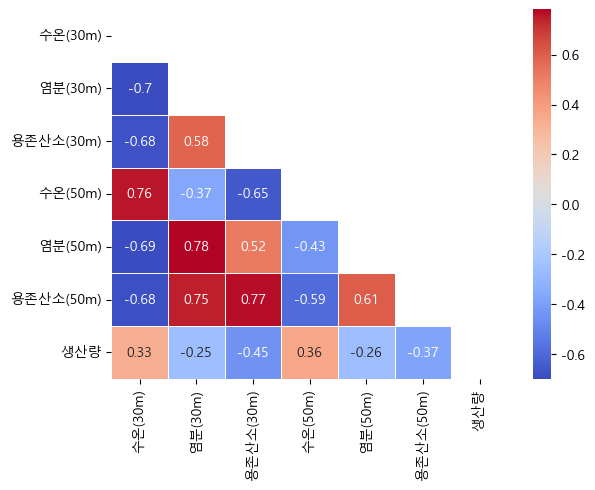

In [20]:
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,mask=mask, annot=True,cmap='coolwarm',linewidths=.5)

In [28]:
df=pd.read_csv('../data/merge/mackerel_price_trade2.csv')
df=df[df['년도']==2016]
corr=df.iloc[:,2:].corr()
corr

,생산량,갈치,참조기,수입,수출,가격 (원)
생산량,1.000000,0.221200,0.897377,-0.158402,0.856368,-0.463926
갈치,0.221200,1.000000,0.367836,0.285108,0.296316,-0.226299
참조기,0.897377,0.367836,1.000000,0.055711,0.958657,-0.314135
수입,-0.158402,0.285108,0.055711,1.000000,0.101483,0.284086
수출,0.856368,0.296316,0.958657,0.101483,1.000000,-0.195422
가격 (원),-0.463926,-0.226299,-0.314135,0.284086,-0.195422,1.000000


<Axes: >

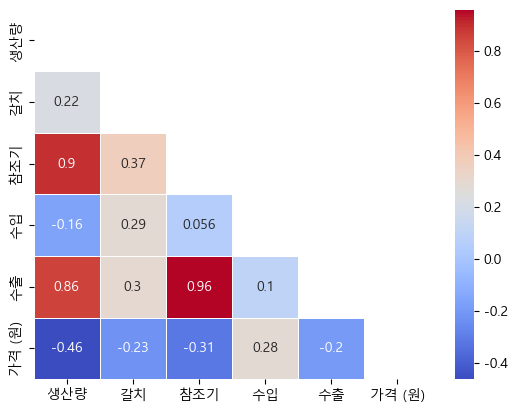

In [29]:
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,mask=mask, annot=True,cmap='coolwarm',linewidths=.5)